#### Discussion Related With Outliers And Impact On Machine Learning!!

Which Machine LEarning Models Are Sensitive To Outliers?

1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM-------- Not Sensitive To Outliers
3. Linear Regression---------- Sensitive To Outliers
4. Logistic Regression------- Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive
10. PCA-------------------------- Sensitive
11. Neural Networks-------------- Sensitive

Sensitive - getting impact

Robust - not getting impact

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
df['Age'].isnull().sum()

177

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Age', ylabel='Density'>

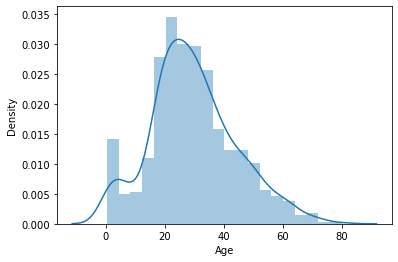

In [5]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

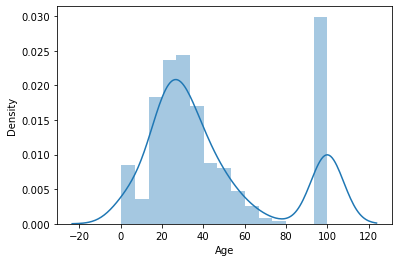

In [6]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of passengers')

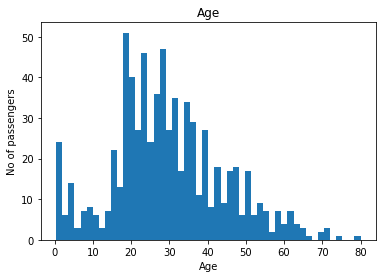

In [7]:
# Guassian Distribution

figure = df['Age'].plot.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

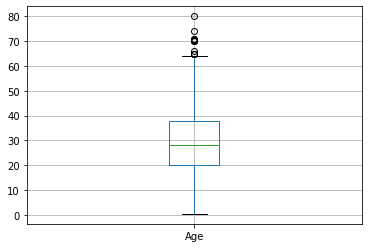

In [8]:
figure = df.boxplot(column='Age')

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
df['Age'].skew()

0.38910778230082704

In [11]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

upper_boundary = np.mean(df['Age']) + 3 * (df['Age'].std())
lower_boundary = np.mean(df['Age']) - 3 * (df['Age'].std())

In [12]:
upper_boundary, lower_boundary

(73.27860964406095, -13.88037434994331)

# If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No of passengers')

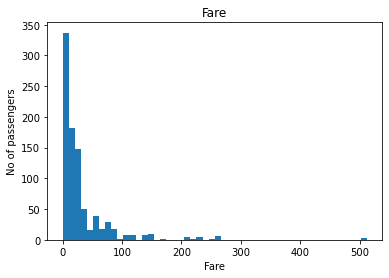

In [21]:
figure = df['Fare'].plot.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

<AxesSubplot:>

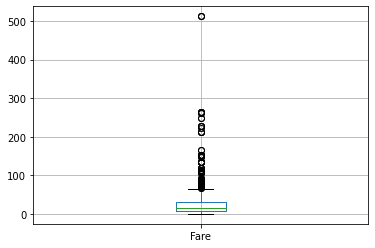

In [22]:
df.boxplot(column="Fare")

In [23]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [24]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [25]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [26]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [29]:
data=df.copy()

In [30]:
data.loc[data['Age']>=73,'Age']=73

In [31]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

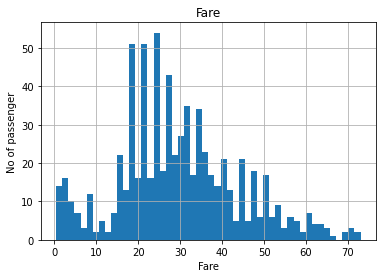

In [32]:
figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

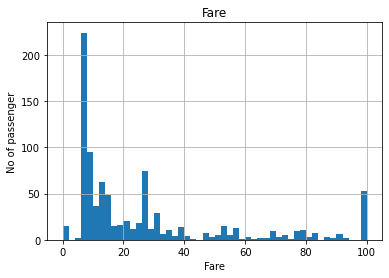

In [33]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [35]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6529850746268657
roc_auc_score: 0.7002876869965478


In [36]:
### Logistic Regression
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6604477611940298
roc_auc_score: 0.7104430379746836
